In [35]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using DifferentialEquations, StaticArrays, CairoMakie

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


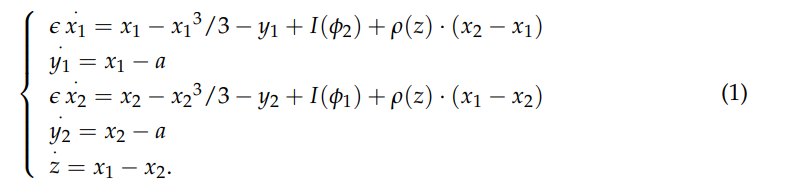

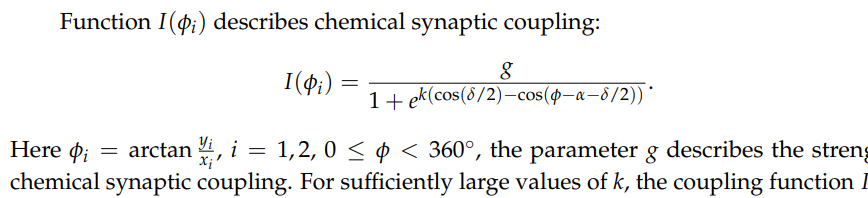

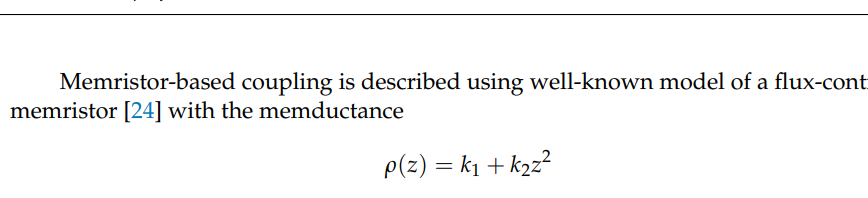

In [36]:
function two_FHN(u, p, t)

    x1, y1, x2, y2, z = u
    ϵ, g, k, σ, a, α, k1, k2 = p
    
    I(ϕ) = g / ( 1 + exp( k * ( cos( σ / 2 ) - cos( ϕ - α - σ / 2 ) ) ) )
    ρ = k1 + k2 * z ^ 2

    dx1_dt = x1 - x1 ^ 3 / 3 - y1 + I( atanh(y2, x2) ) + ρ * (x2 - x1)
    dx1_dt = dx1_dt / ϵ
    dy1_dt = x1 - a

    dx2_dt = x2 - x2 ^ 3 / 3 - y2 + I( atanh(y1, x1) ) + ρ * (x1 - x2)
    dx2_dt = dx2_dt / ϵ
    dy2_dt = x2 - a

    dz_dt = x1 - x2
    
    return SVector(dx1_dt, dy1_dt, dx2_dt, dy2_dt, dz_dt)
end

function two_FHN_get_params()
    ϵ = 0.01; a = -1.01
    k = 50.0; g = 0.1; α = 160; σ = 50;
    k1 = 0.00; k2 = 0.0;
    params = [ϵ, g, k, σ, a, α, k1, k2]
    return params
end

function two_FHN_get_helps(param)
    indexparams = "ϵ = 1, g = 2, k = 3, σ = 4, a = 5, α = 6, k1 = 7, k2 = 8";
    keyp = split(nameparam, ", ");
    dict = Dict(zip(keyp, param));

    return dict, indexparams;
end

two_FHN_get_helps (generic function with 1 method)

In [ ]:
atanh()

In [37]:
params = two_FHN_get_params()
u0 = [-1, -0.5, 0, 0.5, 0.6]
tspan = (0.0, 2000.0)

prob = ODEProblem(two_FHN, SVector{length(u0)}(u0), tspan, params)
sol = solve(prob, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);

MethodError: MethodError: no method matching atanh(::Float64, ::Float64)

Closest candidates are:
  atanh(!Matched::IntervalArithmetic.IntervalRounding{:accurate}, ::T, !Matched::RoundingMode{:Up}) where T<:AbstractFloat
   @ IntervalArithmetic ~/.julia/packages/IntervalArithmetic/EquAX/src/intervals/rounding.jl:235
  atanh(!Matched::IntervalArithmetic.IntervalRounding{:accurate}, ::T, !Matched::RoundingMode{:Down}) where T<:AbstractFloat
   @ IntervalArithmetic ~/.julia/packages/IntervalArithmetic/EquAX/src/intervals/rounding.jl:235
  atanh(!Matched::IntervalArithmetic.IntervalRounding{:slow}, ::T, !Matched::RoundingMode{:Down}) where T<:AbstractFloat
   @ IntervalArithmetic ~/.julia/packages/IntervalArithmetic/EquAX/src/intervals/rounding.jl:218
  ...


In [38]:
tstart = 1; tend = 2000000
f = Figure(size = (1000, 400))
ax = Axis(f[1, 1])
lines!(sol.t[tstart:tend], sol[1, tstart:tend], color = :red, linewidth = 2.0)
lines!(sol.t[tstart:tend], sol[3, tstart:tend], color = :green, linewidth = 2.0)
display(f)

BoundsError: BoundsError: attempt to access 4-element Vector{Float64} at index [1:2000000]

In [39]:
tstart = 1; tend = 2000000
f = Figure(size = (1000, 400))
ax = Axis3(f[1, 1], xlabel = "x2", ylabel = "x1", zlabel = "y2")
lines!(sol[3, tstart:tend], sol[1, tstart:tend], sol[4, tstart:tend])
display(f)

BoundsError: BoundsError: attempt to access 4-element Vector{SVector{5, Float64}} at index [1:2000000]